#1.Importing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2.Importing Library

In [2]:
pip install tensorflow

In [3]:
pip install keras

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
tf.__version__

'2.18.0'

In [6]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#3.Data Preprocessing

Preprocessing the Training set

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dogs_cats/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


Preprocessing the Test set

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dogs_cats/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2006 images belonging to 2 classes.


#4.Buliding The CNN Model

Initialising The CNN

In [9]:
cnn = tf.keras.models.Sequential()

step 01 : Convolution

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


step 02 : Pooling

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Adding a Second Layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

step 03 : Flattening

In [13]:
cnn.add(tf.keras.layers.Flatten())

step 04 : Full Connection

In [14]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

step 05 : output layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#5.Training the CNN

Compiling the CNN

In [16]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the cnn on the training set and evaluating it on the test set

In [17]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3241s 13s/step - accuracy: 0.5184 - loss: 0.7202 - val_accuracy: 0.5444 - val_loss: 0.6845
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 221ms/step - accuracy: 0.5825 - loss: 0.6712 - val_accuracy: 0.6476 - val_loss: 0.6270
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 77s 202ms/step - accuracy: 0.6691 - loss: 0.6059 - val_accuracy: 0.7099 - val_loss: 0.5634
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 207ms/step - accuracy: 0.7020 - loss: 0.5726 - val_accuracy: 0.7552 - val_loss: 0.5198
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.7256 - loss: 0.5304 - val_accuracy: 0.7084 - val_loss: 0.5792
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 193ms/step - accuracy: 0.7503 - loss: 0.5149 - val_accuracy: 0.7468 - val_loss: 0.5235
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 194ms/step - accuracy: 0.7551 - loss: 0.4938 - val_accuracy: 0.7732 - val_loss: 0.4807
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - accuracy: 0.7722 - loss: 0

#6.Making a single prediction

In [18]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/dogs_cats/single_prediction/cat_dog5.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


In [19]:
print(prediction)

cat


In [20]:
print(result)

[[0.9576673]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


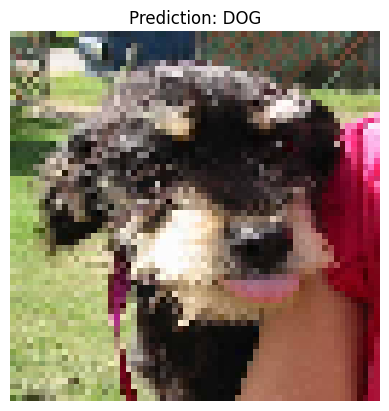

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load your trained model (if you saved it)
# model = tf.keras.models.load_model('/path/to/your/model.h5')
# Instead of loading the model, we will assign the trained model (cnn) to model
model = cnn # Assign your trained model to 'model'

# Path to your image
img_path = '/content/drive/MyDrive/dogs_cats/single_prediction/cat_dog10.jpg'  # or from Drive

# Load and preprocess image
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize

# Predict
result = model.predict(img_array)

# Decode prediction
if result[0][0] > 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

# Show image with prediction
plt.imshow(img)
plt.title(f"Prediction: {prediction.upper()}")
plt.axis('off')
plt.show()

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# Assuming you have already trained your model and named it 'cnn'
model = cnn  # Assign your trained model (cnn) to 'model'

Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=test_set.class_indices.keys()))

63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step
Confusion Matrix
[[1000    0]
 [1006    0]]
Classification Report
              precision    recall  f1-score   support

        cats       0.50      1.00      0.67      1000
        dogs       0.00      0.00      0.00      1006

    accuracy                           0.50      2006
   macro avg       0.25      0.50      0.33      2006
weighted avg       0.25      0.50      0.33      2006



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
